In [1]:
import pandas as pd

In [2]:
## Data Ingestion step

df = pd.read_csv("data/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [15]:
##Segregate Numerical and categorical Columns
numerical_columns= df.columns[df.dtypes!= 'object']
categorical_columns= df.columns[df.dtypes=='object']


In [16]:
print('Numerical_Columns:',numerical_columns)
print('Categorical_Columns:',categorical_columns)

Numerical_Columns: Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
Categorical_Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

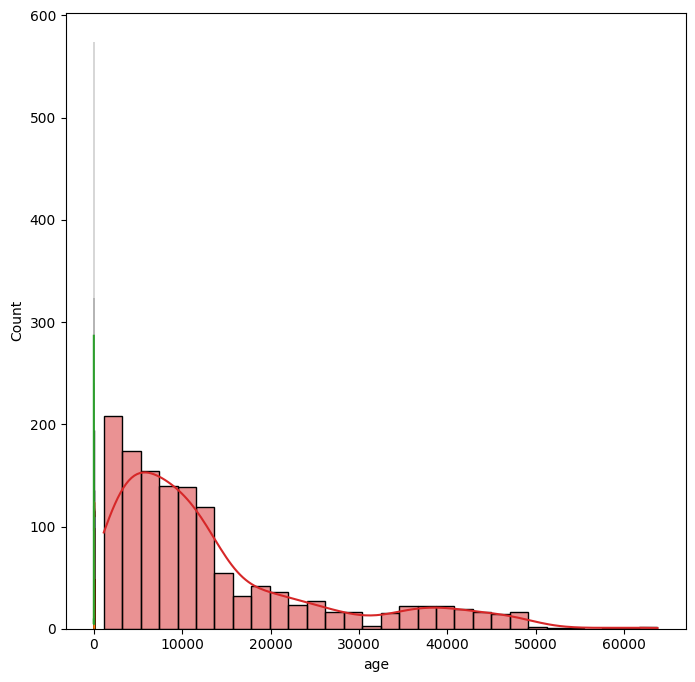

In [22]:
plt.figure(figsize=(8,8))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show

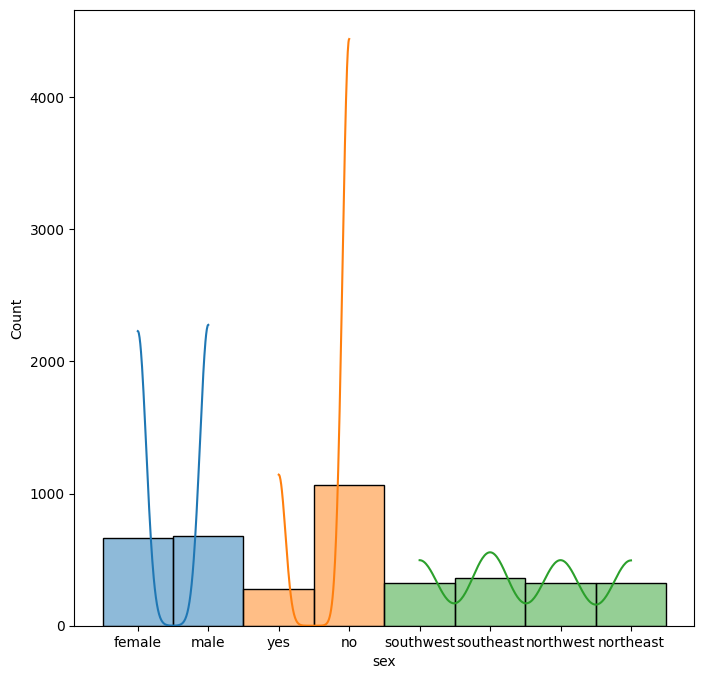

In [21]:
plt.figure(figsize=(8,8))
x=1
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show

<Axes: >

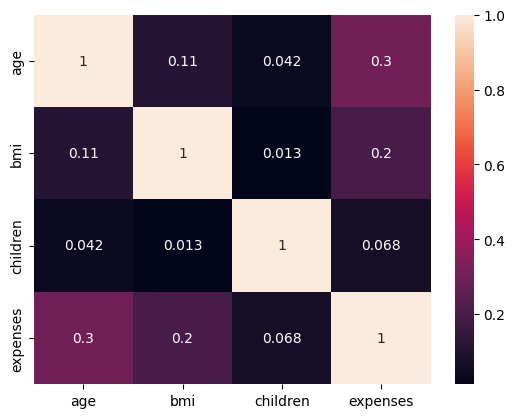

In [25]:
#Correlation

sns.heatmap(df.corr(numeric_only=True),annot=True)

In [26]:
print('Categorical_Columns:',categorical_columns)


Categorical_Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [27]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [28]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [29]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [30]:
smoker_map={"yes":1,"no":2}
sex_map={"male":1,"female":2}
region_map= {"southwest":1,"southeast":2,"northwest":3,"northeast":4}

In [32]:
df['smoker'].replace(smoker_map)


0       1
1       2
2       2
3       2
4       2
       ..
1333    2
1334    2
1335    2
1336    2
1337    1
Name: smoker, Length: 1338, dtype: int64

In [33]:
df['sex'].replace(sex_map)


0       2
1       1
2       1
3       1
4       1
       ..
1333    1
1334    2
1335    2
1336    2
1337    2
Name: sex, Length: 1338, dtype: int64

In [34]:
df['region'].replace(region_map)

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64